# Approach
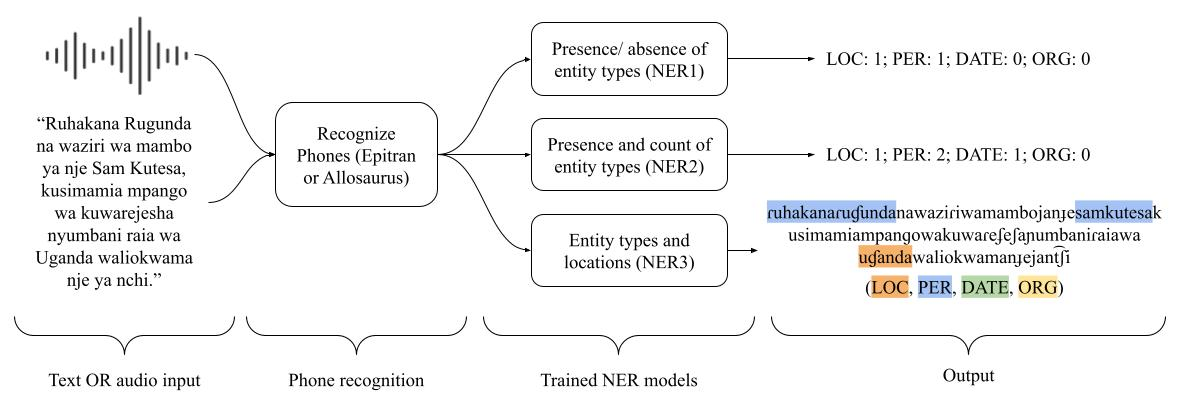
Overall approach


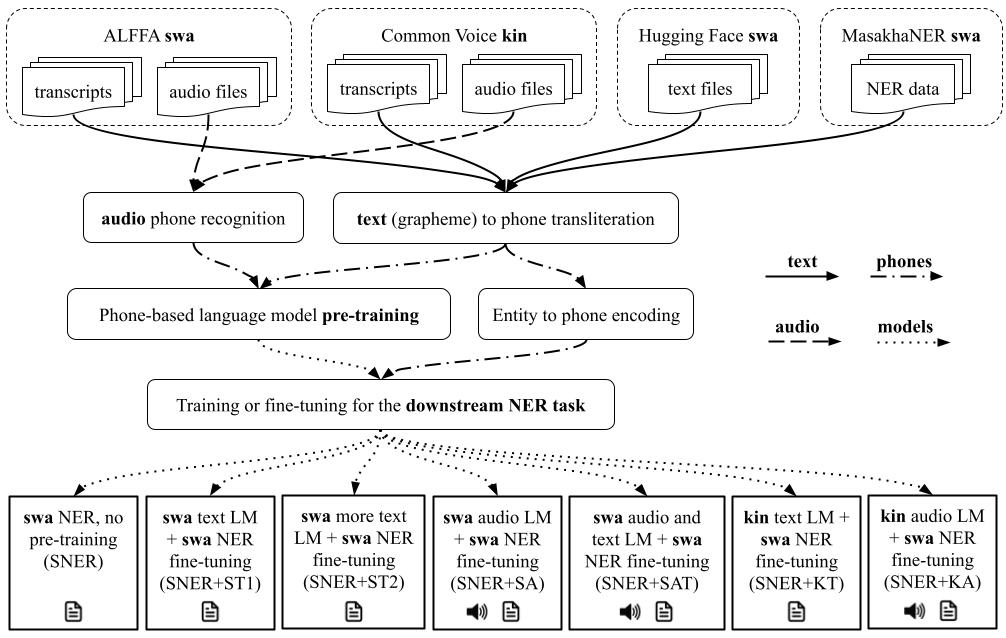

Training Scenarios




## See also 
Transition Matrix: https://colab.research.google.com/drive/1N-8IA8X43z_7dItmPNkph3-uWTlz_20e#scrollTo=5VXkgBpGqwfv

Shiba Finetuning: https://colab.research.google.com/drive/1lnUN3j1SKnEJ1xAXrfJ5G5ptu6hEwxG7#scrollTo=nq2S_mrI26Vl

Experiments sheet: https://docs.google.com/spreadsheets/d/10Mo7tfJHQiKZXDXTViA0OkcbJiW5KTaIKjhaYzm0eYY/edit#gid=2009909118

Pretraining code: https://github.com/sil-ai/colin-summer-2021/blob/main/src/models/run_mlm.py


In [ ]:
!pip install pandas clearml
!pip install plotly
!pip install -U kaleido # https://stackoverflow.com/questions/59815797/how-to-save-plotly-express-plot-into-a-html-or-static-image-file

     |████████████████████████████████| 79.9 MB 51 kB/s 


In [ ]:
# https://plotly.com/python/orca-management/
!pip install "plotly>=4.7.1"
!wget https://github.com/plotly/orca/releases/download/v1.2.1/orca-1.2.1-x86_64.AppImage -O /usr/local/bin/orca
!chmod +x /usr/local/bin/orca
!apt-get install xvfb libgtk2.0-0 libgconf-2-4

## imports

In [ ]:
from clearml import Task
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import math

## Setup credentials


In [ ]:
# Assuming here that you've uploaded this manually. 
!cat clearml.conf > ~/clearml.conf


#AWS install
!mkdir -p ~/.aws
# !cp config ~/.aws
# !cp credentials ~/.aws

!ls ~/.aws
!ls ~/clearml.conf

/root/clearml.conf


<!-- # Abortive attempt to read a .csv -->

In [ ]:
# experiments_csv = pd.read_csv("Experiments - SHIBA finetuning-2021-10-26T1138EST.csv")

In [ ]:
# experiments_csv

In [ ]:
# type(experiments_csv)

In [ ]:
# print(experiments_csv[["input task name (note: step counts deceptive, early stopping was on. See Colab Notebook)","finetuning task ID"]])

## dataframe for datasets with attributes

In [ ]:
datasets_with_attributes = [
  #  {"name":'ALFFA_allosaurus_transcriptions_with_epitran_inventory_jsonl',"lang":"swa", "mode":"phone","source":""}, # wrong!
  {"name":'ALFFA_allosaurus_transcriptions_with_epitran_inventory_no_spaces_jsonl',"lang":"swa", "mode":"phone","source":"audio"},
  {"name":'common_voice_rw_epitran_no_spaces_jsonl',"lang":"rw", "mode":"phone","source":"text"},
  {"name":'hf_swahili_epitran_no_spaces_jsonl',"lang":"swa", "mode":"phone","source":"text"},
  # {"name":'hf_swahili_epitran_plus_alffa_allosaurus_no_word_boundaries_jsonl',"lang":"swa", "mode":"phone","source":""}, # wrong!
  {"name":'hf_swahili_epitran_plus_alffa_allosaurus_no_word_boundaries_spaces_fixed_jsonl',"lang":"swa", "mode":"phone","source":"text+audio"},
  {"name":'hf_swahili_epitran_plus_alffa_gold_epitran_no_word_boundaries_jsonl',"lang":"swa", "mode":"phone","source":"text"},
  {"name":'hf_swahili_no_spaces_jsonl',"lang":"swa", "mode":"text","source":"text"},
  {"name":'hf_swahili_plus_alffa_gold_no_word_boundaries_jsonl',"lang":"swa", "mode":"text","source":"text"},
  {"name":'rw_allosaurus_204_of_258_train_jsonl',"lang":"rw", "mode":"phone","source":"audio"},
  {"name":'None',"lang":"none", "mode":"none","source":"none"},
]
datasets_with_attributes = pd.DataFrame(datasets_with_attributes)
datasets_with_attributes

,name,lang,mode,source
0,ALFFA_allosaurus_transcriptions_with_epitran_i...,swa,phone,audio
1,common_voice_rw_epitran_no_spaces_jsonl,rw,phone,text
2,hf_swahili_epitran_no_spaces_jsonl,swa,phone,text
3,hf_swahili_epitran_plus_alffa_allosaurus_no_wo...,swa,phone,text+audio
4,hf_swahili_epitran_plus_alffa_gold_epitran_no_...,swa,phone,text
5,hf_swahili_no_spaces_jsonl,swa,text,text
6,hf_swahili_plus_alffa_gold_no_word_boundaries_...,swa,text,text
7,rw_allosaurus_204_of_258_train_jsonl,rw,phone,audio
8,None,none,none,none


In [ ]:
datasets_with_attributes.name.to_list()

['ALFFA_allosaurus_transcriptions_with_epitran_inventory_no_spaces_jsonl',
 'common_voice_rw_epitran_no_spaces_jsonl',
 'hf_swahili_epitran_no_spaces_jsonl',
 'hf_swahili_epitran_plus_alffa_allosaurus_no_word_boundaries_spaces_fixed_jsonl',
 'hf_swahili_epitran_plus_alffa_gold_epitran_no_word_boundaries_jsonl',
 'hf_swahili_no_spaces_jsonl',
 'hf_swahili_plus_alffa_gold_no_word_boundaries_jsonl',
 'rw_allosaurus_204_of_258_train_jsonl',
 'None']

# Finetunings


## Manually created finetunings dict
I give up let's do it manually

In [ ]:
import json
finetuned_on_swahili_words = {
#input task name (note: step counts deceptive, early stopping was on. See Colab Notebook)	finetuning task ID
  "text only, sourced from HF swahili, no word boundaries":	
  {
      "SHIBA, train='hf_swahili_no_spaces_jsonl', val='hf_swahili_no_spaces_jsonl', steps=30000, seed=420":	"49026088ebea4649b6549d3eeb6a8fc6",
      "SHIBA, train='hf_swahili_no_spaces_jsonl', val='hf_swahili_no_spaces_jsonl', steps=30000, seed=314":	"2c50d3b4c30f416bbce7a6bfbe576899",
      "SHIBA, train='hf_swahili_no_spaces_jsonl', val='hf_swahili_no_spaces_jsonl', steps=30000, seed=42": "fec7f5e0a33f4cfa9b698e01d20d221a"
  },
    
    
  "text only, sourced from HF swahili, no word boundaries, with more text sourced from ALFFA gold transcripts (aka if we had ASR perfectly done)":
  {
    "SHIBA, train='hf_swahili_plus_alffa_gold_no_word_boundaries_jsonl', val='hf_swahili_no_spaces_jsonl', steps=30000, seed=420":	"9e461b643d5c41ae896fc4b30f587b3c",
    "SHIBA, train='hf_swahili_plus_alffa_gold_no_word_boundaries_jsonl', val='hf_swahili_no_spaces_jsonl', steps=30000, seed=314":	"736f48325f0740d5b236625de853a084",
    "SHIBA, train='hf_swahili_plus_alffa_gold_no_word_boundaries_jsonl', val='hf_swahili_no_spaces_jsonl', steps=30000, seed=666":	"bc9f828bfb1d43bd9cd46076dfee0e38",
  },
}


finetuned_on_kin_phones = {

  "epitran on Kinyarwanda Common Voice Transcripts, finetune on kin phones":
  {
    "SHIBA, train='common_voice_rw_epitran_no_spaces_jsonl', val='common_voice_rw_epitran_no_spaces_jsonl', steps=30000, seed=420":	"0864e6b46b3c4502a99231a6d859f54a",
    "SHIBA, train='common_voice_rw_epitran_no_spaces_jsonl', val='common_voice_rw_epitran_no_spaces_jsonl', steps=30000, seed=42":	"99d02e7d5a264c8992d2b4121b6ebf4d",
    "SHIBA, train='common_voice_rw_epitran_no_spaces_jsonl', val='common_voice_rw_epitran_no_spaces_jsonl', steps=30000, seed=7":	"fa8bd60993b04125a2f572f5d2acf147",  
    "SHIBA, train='common_voice_rw_epitran_no_spaces_jsonl', val='common_voice_rw_epitran_no_spaces_jsonl', steps=300000, seed=777" : "6f4cb4718c7c4a25b3a041c63f6ff2b4",
  },

  "Model not pretrained at all (Colab notebook), evaluated on Kinyarwanda":
  {
    "Seed=42":	"ac21a470c9f548d4a56e603eb1653950",
    "Seed=44":	"849e37ab32be46e08b835e1639e9da61",
    "Seed=45":	"e74ff2e849614da992f742e1e7554910",
  },

  "pretrain on Kinyarwanda allosaurus'ed audio, finetune on kin phones":
  {
    "SHIBA, train='rw_allosaurus_204_of_258_train_jsonl', val='rw_allosaurus_204_of_258_train_jsonl', steps=30000, seed=42":	"b205adb370fc4d7cb6c25f00aa3157f4",
    "SHIBA, train='rw_allosaurus_204_of_258_train_jsonl', val='rw_allosaurus_204_of_258_train_jsonl', steps=30000, seed=420":	"70fc384b9e5f46dc981623a77ebb8a60",
    "SHIBA, train='rw_allosaurus_204_of_258_train_jsonl', val='rw_allosaurus_204_of_258_train_jsonl', steps=30000, seed=7":	"93fc788ce13e4072974ee26b81d6df86",
    "SHIBA, train='rw_allosaurus_204_of_258_train_jsonl', val='rw_allosaurus_204_of_258_train_jsonl', steps=30000, seed=666":	"7c72b9e44f804063a453636f86a2b904",
  },
}  
	
	


finetuned_on_swa_phones = {
  "epitran on text only, sourced from HF swahili, no word boundaries.":
  {
      "SHIBA, train='hf_swahili_epitran_no_spaces_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=20000, seed=42":	"33022d3fbe2f4142ba481d23c5963e20",
    "SHIBA, train='hf_swahili_epitran_no_spaces_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=30000, seed=42":	"4b803de0e2244aa590dd04f318855fb9",
    "SHIBA, train='hf_swahili_epitran_no_spaces_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=30000, seed=420":	"46817ec257444c0085e39557b93ae1ac",
    "SHIBA, train='hf_swahili_epitran_no_spaces_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=30000, seed=314":	"8a8bde2f3d5649009c014bc9e9b37bfe",
    "SHIBA, train='hf_swahili_epitran_no_spaces_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=30000, seed=314":	"1768cf4c35534e93ab8d77d483098939",
  },	


  "epitran on text only, sourced from HF swahili and with more text sourced from ALFFA gold transcripts, no word boundaries":
  {
    "SHIBA, train='hf_swahili_epitran_plus_alffa_gold_epitran_no_word_boundaries_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=20000, seed=42":	"54c8f5a4fb9145c68d877a60abb7120c",
    "SHIBA, train='hf_swahili_epitran_plus_alffa_gold_epitran_no_word_boundaries_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=30000, seed=42":	"dc2c78f9a55d404499a980d1b8f4cda2",
    "SHIBA, train='hf_swahili_epitran_plus_alffa_gold_epitran_no_word_boundaries_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=30000, seed=420":	"33b56b78507a4125bafc8de53e09d259",
  },
    


    
    
  "epitran on text sourced from HF Swahili, and allosaurus on ALFFA audio clips (with spaces removed)":
  {
    "SHIBA, train='hf_swahili_epitran_plus_alffa_allosaurus_no_word_boundaries_spaces_fixed_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=300000, seed=42":	"f1d1e1d891a94a669e8580f20535403c",
    "SHIBA, train='hf_swahili_epitran_plus_alffa_allosaurus_no_word_boundaries_spaces_fixed_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=300000, seed=420":	"c6e8b3828e5a4980b221008c3f031f7b",
    "SHIBA, train='hf_swahili_epitran_plus_alffa_allosaurus_no_word_boundaries_spaces_fixed_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=300000, seed=314":	"9c3a4bcd5b7042a88c445258d1f028f8",
    "SHIBA, train='hf_swahili_epitran_plus_alffa_allosaurus_no_word_boundaries_spaces_fixed_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=300000, seed=7":	"fdc7e4f92dd046528834e8583ef4e80a",
    "SHIBA, train='hf_swahili_epitran_plus_alffa_allosaurus_no_word_boundaries_spaces_fixed_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=300000, seed=666":	"fa6a29d8a7294d5a98ae30c369c47ef4",
    "SHIBA, train='hf_swahili_epitran_plus_alffa_allosaurus_no_word_boundaries_spaces_fixed_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=300000, seed=777":	"3f8dc5e0eec841e8bda2ae15add879f8",
    "SHIBA, train='hf_swahili_epitran_plus_alffa_allosaurus_no_word_boundaries_spaces_fixed_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=300000, seed=365":	"3586ce37c953486284015d08bf8d84f5",
  },	
        
    
  "allosaurus only on ALFFA with spaces removed":
  {
    "SHIBA, train='ALFFA_allosaurus_transcriptions_with_epitran_inventory_no_spaces_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=300000, seed=666":	"41f4ed5accee4628a648eb9114b65db8",
    "SHIBA, train='ALFFA_allosaurus_transcriptions_with_epitran_inventory_no_spaces_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=300000, seed=7":	"ffc660d6d5a74944941c82aa48adee90",
    "SHIBA, train='ALFFA_allosaurus_transcriptions_with_epitran_inventory_no_spaces_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=300000, seed=314":	"1ff606d7c15b4f91ae76d2e8337fa916",
    "SHIBA, train='ALFFA_allosaurus_transcriptions_with_epitran_inventory_no_spaces_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=300000, seed=420":	"c463687b6148463fa2c79b64ccebe490",
    "SHIBA, train='ALFFA_allosaurus_transcriptions_with_epitran_inventory_no_spaces_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=300000, seed=42":	"f696751427264c42aff2e7adbed8dbff",
  },  
    
  "Pretrained on epitran on text from Common Voice Kinyarwanda, but finetuned on swa_phones":
  {
    "SHIBA, train='common_voice_rw_epitran_no_spaces_jsonl', val='common_voice_rw_epitran_no_spaces_jsonl', steps=30000, seed=420":	"8ea9ae6b99554b6baecff5f99d25a3b8",
    "SHIBA, train='common_voice_rw_epitran_no_spaces_jsonl', val='common_voice_rw_epitran_no_spaces_jsonl', steps=30000, seed=42":	  "5bf34dd5dad84068857843aa5c41375e",
    "SHIBA, train='common_voice_rw_epitran_no_spaces_jsonl', val='common_voice_rw_epitran_no_spaces_jsonl', steps=30000, seed=7":	   "a041e1cecd9a46208f5599cf54264c71",
    "SHIBA, train='common_voice_rw_epitran_no_spaces_jsonl', val='common_voice_rw_epitran_no_spaces_jsonl', steps=30000, seed=7":	   "7725f5bed94848039c68f2a3a573ded6",
    "SHIBA, train='common_voice_rw_epitran_no_spaces_jsonl', val='common_voice_rw_epitran_no_spaces_jsonl', steps=300000, seed=777" : "6b4c3b13cdb34743a83d5c2622b9b741"
  },  
  "Pretrained on allosaurus on audio from Common Voice Kinyarwanda, but finetuned on swa_phones":	
  {
    "SHIBA, train='rw_allosaurus_204_of_258_train_jsonl', val='rw_allosaurus_204_of_258_train_jsonl', steps=30000, seed=42":	"a1963b9fec804a75b8f0d2864f5e9469",
    "SHIBA, train='rw_allosaurus_204_of_258_train_jsonl', val='rw_allosaurus_204_of_258_train_jsonl', steps=30000, seed=420":	"a514e2f61e7d4b8aaee1e573e216dc6e",
    "SHIBA, train='rw_allosaurus_204_of_258_train_jsonl', val='rw_allosaurus_204_of_258_train_jsonl', steps=30000, seed=7":	"1e897ef7bba440e980272da135394837",
    "SHIBA, train='rw_allosaurus_204_of_258_train_jsonl', val='rw_allosaurus_204_of_258_train_jsonl', steps=30000, seed=666":	"13bb3c5f365448c18337c29020b71e3d",
  },  
    
    
  "Model not pretrained at all (Colab notebook), evaluated on Swahili":
  {
    "SHIBA default model, Seed=42, finetuned on swa_phonemes_no_word_boundaries":	"5c6ad12d3ce34c63be951d113e78e6f6",
    "SHIBA default model, Seed=43, finetuned on swa_phonemes_no_word_boundaries":	"1eaa36267ab2403f86430d3f80dea007",
    "SHIBA default model, Seed=44, finetuned on swa_phonemes_no_word_boundaries":	"1984b7f35fda4b31a8741008e8099828",
    "SHIBA default model, Seed=45, finetuned on swa_phonemes_no_word_boundaries":	"33b56b78507a4125bafc8de53e09d259",
    "SHIBA default model, Seed=46, finetuned on swa_phonemes_no_word_boundaries":	"9f31995e071c4a9d8940f7c72109d2bf",
    "SHIBA default model, Seed=47, finetuned on swa_phonemes_no_word_boundaries":	"b7dc491816ff4b148c5cd0ab37b4a9fa",
    "SHIBA default model, Seed=48, finetuned on swa_phonemes_no_word_boundaries":	"1c2d340dbe284ae68c953c63d3603561",
    "SHIBA default model, Seed=49, finetuned on swa_phonemes_no_word_boundaries":	"927876ba2fa24c628e72d45263e223b9",
    "SHIBA default model, Seed=50, finetuned on swa_phonemes_no_word_boundaries":	"469b5da2a34a41fcb394240ef9585465",
  },

}








finetuned_on_swa_phones_forgot_to_remove_spaces_in_pretraining ={
  "epitran on text sourced from HF Swahili, and allosaurus on ALFFA audio clips (error, forgot to remove spaces)":
  {
    "SHIBA, train='hf_swahili_epitran_plus_alffa_allosaurus_no_word_boundaries_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=20000, seed=42":	"17f3d1858a994204977d618cbd20a46d",
    "SHIBA, train='hf_swahili_epitran_plus_alffa_allosaurus_no_word_boundaries_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=30000, seed=42":	"069379d8d8b240fbb9f59bc4837cefef",
    "SHIBA, train='hf_swahili_epitran_plus_alffa_allosaurus_no_word_boundaries_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=30000, seed=420":	"7f7eedf1233443b4b611124ea2e6cd3b",
  },
 	
  "allosaurus only on ALFFA (error, forgot to remove spaces)":	
  {
    "SHIBA, train='ALFFA_allosaurus_transcriptions_with_epitran_inventory_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=30000, seed=314":	"03a563cd6b064d5094d627383a46f4a9",
    "SHIBA, train='ALFFA_allosaurus_transcriptions_with_epitran_inventory_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=30000, seed=42":	"fc32e60e95d84f64a6727b32f697bc75",
    "SHIBA, train='ALFFA_allosaurus_transcriptions_with_epitran_inventory_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=30000, seed=420":	"e71a7a2b693e4d9687fe88d127682093",
  },  
}


all_finetunings = {
    "finetuned_on_swa_phones": finetuned_on_swa_phones,
    "finetuned_on_swahili_words": finetuned_on_swahili_words,
    "finetuned_on_kin_phones": finetuned_on_kin_phones,
    "finetuned_on_swa_phones_forgot_to_remove_spaces_in_pretraining":finetuned_on_swa_phones_forgot_to_remove_spaces_in_pretraining,
}
print(json.dumps(all_finetunings, indent=4))


{
    "finetuned_on_swa_phones": {
        "epitran on text only, sourced from HF swahili, no word boundaries.": {
            "SHIBA, train='hf_swahili_epitran_no_spaces_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=20000, seed=42": "33022d3fbe2f4142ba481d23c5963e20",
            "SHIBA, train='hf_swahili_epitran_no_spaces_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=30000, seed=42": "4b803de0e2244aa590dd04f318855fb9",
            "SHIBA, train='hf_swahili_epitran_no_spaces_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=30000, seed=420": "46817ec257444c0085e39557b93ae1ac",
            "SHIBA, train='hf_swahili_epitran_no_spaces_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=30000, seed=314": "1768cf4c35534e93ab8d77d483098939"
        },
        "epitran on text only, sourced from HF swahili and with more text sourced from ALFFA gold transcripts, no word boundaries": {
            "SHIBA, train='hf_swahili_epitran_plus_alffa_gold_epitran_no_word_b

In [ ]:
for finetuning_set in all_finetunings:
  print(f"finetuning_set: {finetuning_set}")
  experiments_finetuned_thus = all_finetunings[finetuning_set]


  for pretraining_category in experiments_finetuned_thus:
    print(f"\t pretrained on: {pretraining_category}")
    experiments_pretrained_thus = experiments_finetuned_thus[pretraining_category]
    for experiment in experiments_pretrained_thus:
      print(f"\t\texperiment ID is {experiments_pretrained_thus[experiment]}")

finetuning_set: finetuned_on_swa_phones
	 pretrained on: epitran on text only, sourced from HF swahili, no word boundaries.
		experiment ID is 33022d3fbe2f4142ba481d23c5963e20
		experiment ID is 4b803de0e2244aa590dd04f318855fb9
		experiment ID is 46817ec257444c0085e39557b93ae1ac
		experiment ID is 1768cf4c35534e93ab8d77d483098939
	 pretrained on: epitran on text only, sourced from HF swahili and with more text sourced from ALFFA gold transcripts, no word boundaries
		experiment ID is 54c8f5a4fb9145c68d877a60abb7120c
		experiment ID is dc2c78f9a55d404499a980d1b8f4cda2
		experiment ID is 33b56b78507a4125bafc8de53e09d259
	 pretrained on: epitran on text sourced from HF Swahili, and allosaurus on ALFFA audio clips (with spaces removed)
		experiment ID is f1d1e1d891a94a669e8580f20535403c
		experiment ID is c6e8b3828e5a4980b221008c3f031f7b
		experiment ID is 9c3a4bcd5b7042a88c445258d1f028f8
		experiment ID is fdc7e4f92dd046528834e8583ef4e80a
		experiment ID is fa6a29d8a7294d5a98ae30c369c47ef

## function to slice experiments

In [ ]:

# COLIN: Overwriting original tasks object. Subsequent code expects a dictionary of lists. 
# Instead, I have created a 3-level dict. I must convert. 
def get_task_ids(all_finetunings, finetuning_set, pretraining_categories_to_get=None):  
  
  tasks = {
      
  }

  # print(f"finetuning_set: {finetuning_set}")
  experiments_finetuned_thus = all_finetunings[finetuning_set]


  for pretraining_category in experiments_finetuned_thus:
    if pretraining_categories_to_get is None or pretraining_category in pretraining_categories_to_get:
      # print(f"\t pretrained on: {pretraining_category}")
      experiments_pretrained_thus = experiments_finetuned_thus[pretraining_category]
      task_id_list = []
      for experiment in experiments_pretrained_thus:
        task_id = experiments_pretrained_thus[experiment]
        # print(f"\t\texperiment ID is {task_id}")
        task_id_list.append(task_id)
      tasks[pretraining_category] = task_id_list

  return tasks

 

## Select finetunings from dict and get task id


In [ ]:
# should get all the dictionaries
finetuning_set=None
pretraining_categories_to_get = None

# should create a dictionary of lists covering all the ones finetuned on swa
finetuning_set="finetuned_on_swa_phones"
pretraining_categories_to_get = None

# should create a dictionary of lists covering all the ones finetuned on kin
# finetuning_set="finetuned_on_kin_phones"


# should create a dictionary of lists covering all the ones finetuned on kin, pretrained on allosaurus'ed Common Voice
#finetuning_set="finetuned_on_kin_phones"
# tasks = get_task_ids(all_finetunings, finetuning_set=finetuning_set, pretraining_categories_to_get=["pretrain on Kinyarwanda allosaurus'ed audio, finetune on kin phones"])

# should create a dictionary of lists covering all the ones finetuned on kin, pretrained on allosaurus'ed Common Voice, as well as the ones not pretrained at all
#finetuning_set="finetuned_on_kin_phones"
#tasks = get_task_ids(all_finetunings, finetuning_set=finetuning_set, pretraining_categories_to_get=["pretrain on Kinyarwanda allosaurus'ed audio, finetune on kin phones", "Model not pretrained at all (Colab notebook), evaluated on Kinyarwanda"])
tasks = get_task_ids(all_finetunings, finetuning_set=finetuning_set,pretraining_categories_to_get = pretraining_categories_to_get)
print(json.dumps(tasks, indent=4)) 

{
    "epitran on text only, sourced from HF swahili, no word boundaries.": [
        "33022d3fbe2f4142ba481d23c5963e20",
        "4b803de0e2244aa590dd04f318855fb9",
        "46817ec257444c0085e39557b93ae1ac",
        "1768cf4c35534e93ab8d77d483098939"
    ],
    "epitran on text only, sourced from HF swahili and with more text sourced from ALFFA gold transcripts, no word boundaries": [
        "54c8f5a4fb9145c68d877a60abb7120c",
        "dc2c78f9a55d404499a980d1b8f4cda2",
        "33b56b78507a4125bafc8de53e09d259"
    ],
    "epitran on text sourced from HF Swahili, and allosaurus on ALFFA audio clips (with spaces removed)": [
        "f1d1e1d891a94a669e8580f20535403c",
        "c6e8b3828e5a4980b221008c3f031f7b",
        "9c3a4bcd5b7042a88c445258d1f028f8",
        "fdc7e4f92dd046528834e8583ef4e80a",
        "fa6a29d8a7294d5a98ae30c369c47ef4",
        "3f8dc5e0eec841e8bda2ae15add879f8",
        "3586ce37c953486284015d08bf8d84f5"
    ],
    "allosaurus only on ALFFA with spaces removed"

## Getting the scalars from clearML

In [ ]:
from clearml import InputModel
list_of_task_dicts = [] # https://stackoverflow.com/questions/20638006/convert-list-of-dictionaries-to-a-pandas-dataframe
list_of_parent_tasks= []
for pretraining_category in tasks:
  for task_id in tasks[pretraining_category]:
    task_dict = {}
    task_dict["task_id"] = task_id
    task_dict["pretraining_category"] = pretraining_category
    task_dict["finetuning_set"] = finetuning_set
    

    
    retrieved_task = Task.get_task(task_id)
    print(retrieved_task.name)
    task_dict["task_name"] = retrieved_task.name

    # get the scalars: https://clear.ml/docs/latest/docs/references/sdk/task#get_reported_scalars
    retrieved_scalars = retrieved_task.get_reported_scalars()

    # models = retrieved_task.get_models()
    # print(models)
    # input_model = models["input"][0]
    # print(input_model)
    

    # pretraining_task_id = input_model.task
    # print(f"pretraining_task_id {pretraining_task_id}")
    # task_dict["pretraining_task_id"] = pretraining_task_id
    # pretraining_task = Task.get_task(pretraining_task_id)
    # pretraining_task_scalars = pretraining_task.get_reported_scalars()
    # task_dict["pretraining_task_scalars"] = pretraining_task_scalars
    # except AttributeError: 
    #   print(f"couldn't get .task for input model {input_model}")



    # eval_scalars = retrieved_scalars["eval"]
    task_dict["reported_scalars"] = retrieved_scalars
    list_of_task_dicts.append(task_dict)
    
# df
# list_of_task_dicts

finetune Shiba using model from Task 'SHIBA, train='hf_swahili_epitran_no_spaces_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=20000, seed=42''
finetune Shiba using model from Task 'SHIBA, train='hf_swahili_epitran_no_spaces_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=30000, seed=42''
finetune Shiba using model from Task 'SHIBA, train='hf_swahili_epitran_no_spaces_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=30000, seed=420''
[rerun with seed 43]finetune Shiba using model from Task 'SHIBA, train='hf_swahili_epitran_no_spaces_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=30000, seed=314''
finetune Shiba using model from Task 'SHIBA, train='hf_swahili_epitran_plus_alffa_gold_epitran_no_word_boundaries_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=20000, seed=42''
finetune Shiba using model from Task 'SHIBA, train='hf_swahili_epitran_plus_alffa_gold_epitran_no_word_boundaries_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=30000

In [ ]:
print(len(list_of_task_dicts))
print(list_of_task_dicts[0])

35
{'task_id': '33022d3fbe2f4142ba481d23c5963e20', 'pretraining_category': 'epitran on text only, sourced from HF swahili, no word boundaries.', 'finetuning_set': 'finetuned_on_swa_phones', 'task_name': "finetune Shiba using model from Task 'SHIBA, train='hf_swahili_epitran_no_spaces_jsonl', val='hf_swahili_epitran_no_spaces_jsonl', steps=20000, seed=42''", 'reported_scalars': {'eval': {'accuracy_score_by_first_char': {'name': 'accuracy_score_by_first_char', 'x': [132, 264, 396, 528, 660, 792, 924, 1056, 1188, 1320, 1452, 1584, 1716, 1848, 1980, 2112, 2244, 2376, 2508, 2640, 2772, 2904], 'y': [0.3924870491027832, 0.44155845046043396, 0.47302383184432983, 0.4824766218662262, 0.5035377144813538, 0.5117139220237732, 0.49421295523643494, 0.5359712243080139, 0.5043050646781921, 0.5087500214576721, 0.5006165504455566, 0.5131579041481018, 0.5328554511070251, 0.5154130458831787, 0.5070257782936096, 0.5239899158477783, 0.5235849022865295, 0.5048308968544006, 0.5272496938705444, 0.52237004041671

## We need a dataframe with one row per iteration, but also the pretraining category, taskId, perplexity, pretraining_dataset


This will let us set color accordingly. 

https://www.statology.org/pandas-add-row-to-dataframe/

https://stackoverflow.com/questions/20638006/convert-list-of-dictionaries-to-a-pandas-dataframe

```
iteration, task_id, pretraining_category, finetuning_set, eval_loss, eval_perplexity, task_name, pretraining_data, pretraining_dataset
```

### Adding in perplexities
In https://github.com/sil-ai/colin-summer-2021/blob/main/src/models/run_mlm.py, perplexity is simply math.exp(eval_loss)

See also https://stackoverflow.com/questions/60832547/where-is-perplexity-calculated-in-the-huggingface-gpt2-language-model-code



In [ ]:

used_for_dataframe = []
for task_dict in list_of_task_dicts:  
  task_id = task_dict["task_id"]
  pretraining_category = task_dict["pretraining_category"]
  finetuning_set = task_dict["finetuning_set"]
  eval_loss_scalar_name = task_dict["reported_scalars"]["eval"]["loss"]["name"]
  eval_loss_scalar_x = task_dict["reported_scalars"]["eval"]["loss"]["x"] # iterations count
  eval_loss_scalar_y = task_dict["reported_scalars"]["eval"]["loss"]["y"] # loss value 
  task_name = task_dict["task_name"]  


  pretraining_dataset = "None"
  # get pretraining_sources
  for possible_pretraining_dataset in datasets_with_attributes.name.to_list():
    if f"train='{possible_pretraining_dataset}'" in task_name:
      pretraining_dataset = possible_pretraining_dataset


  # print(task_name)
  # print(pretraining_dataset)

  # print(task_id)
  # print(eval_loss_scalar_x)
  # print(eval_loss_scalar_y)
  for x, y in zip(eval_loss_scalar_x, eval_loss_scalar_y):
    row_for_dataframe = {}
    # print(x)
    # print(y)
    row_for_dataframe["iteration"] = x
    row_for_dataframe["eval_loss"] = y
    row_for_dataframe["eval_perplexity"] = math.exp(y)
    row_for_dataframe["task_id"] = task_id
    row_for_dataframe["pretraining_category"] = pretraining_category
    row_for_dataframe["pretraining_dataset"] = pretraining_dataset
    row_for_dataframe["finetuning_set"] = finetuning_set
    row_for_dataframe["task_name"] = task_dict["task_name"]



    used_for_dataframe.append(row_for_dataframe)

finetunings_dataframe = pd.DataFrame(used_for_dataframe)
print(finetunings_dataframe.shape)
finetunings_dataframe = pd.merge(finetunings_dataframe, datasets_with_attributes, how="left", left_on='pretraining_dataset', right_on='name')
finetunings_dataframe


(852, 8)


,iteration,eval_loss,eval_perplexity,task_id,pretraining_category,pretraining_dataset,finetuning_set,task_name,name,lang,mode,source
0,132,0.322392,1.380425,33022d3fbe2f4142ba481d23c5963e20,"epitran on text only, sourced from HF swahili,...",hf_swahili_epitran_no_spaces_jsonl,finetuned_on_swa_phones,"finetune Shiba using model from Task 'SHIBA, t...",hf_swahili_epitran_no_spaces_jsonl,swa,phone,text
1,264,0.287287,1.332807,33022d3fbe2f4142ba481d23c5963e20,"epitran on text only, sourced from HF swahili,...",hf_swahili_epitran_no_spaces_jsonl,finetuned_on_swa_phones,"finetune Shiba using model from Task 'SHIBA, t...",hf_swahili_epitran_no_spaces_jsonl,swa,phone,text
2,396,0.314968,1.370215,33022d3fbe2f4142ba481d23c5963e20,"epitran on text only, sourced from HF swahili,...",hf_swahili_epitran_no_spaces_jsonl,finetuned_on_swa_phones,"finetune Shiba using model from Task 'SHIBA, t...",hf_swahili_epitran_no_spaces_jsonl,swa,phone,text
3,528,0.316619,1.372479,33022d3fbe2f4142ba481d23c5963e20,"epitran on text only, sourced from HF swahili,...",hf_swahili_epitran_no_spaces_jsonl,finetuned_on_swa_phones,"finetune Shiba using model from Task 'SHIBA, t...",hf_swahili_epitran_no_spaces_jsonl,swa,phone,text
4,660,0.334254,1.396898,33022d3fbe2f4142ba481d23c5963e20,"epitran on text only, sourced from HF swahili,...",hf_swahili_epitran_no_spaces_jsonl,finetuned_on_swa_phones,"finetune Shiba using model from Task 'SHIBA, t...",hf_swahili_epitran_no_spaces_jsonl,swa,phone,text
...,...,...,...,...,...,...,...,...,...,...,...,...
847,2904,0.589650,1.803356,469b5da2a34a41fcb394240ef9585465,"Model not pretrained at all (Colab notebook), ...",None,finetuned_on_swa_phones,"finetune Shiba using no pretrained model, seed=50",None,none,none,none
848,3036,0.606451,1.833912,469b5da2a34a41fcb394240ef9585465,"Model not pretrained at all (Colab notebook), ...",None,finetuned_on_swa_phones,"finetune Shiba using no pretrained model, seed=50",None,none,none,none
849,3168,0.577205,1.781054,469b5da2a34a41fcb394240ef9585465,"Model not pretrained at all (Colab notebook), ...",None,finetuned_on_swa_phones,"finetune Shiba using no pretrained model, seed=50",None,none,none,none
850,3300,0.615081,1.849806,469b5da2a34a41fcb394240ef9585465,"Model not pretrained at all (Colab notebook), ...",None,finetuned_on_swa_phones,"finetune Shiba using no pretrained model, seed=50",None,none,none,none


## Visualize finetunings

Following instructions in https://plotly.com/python/line-charts/#line-plots-with-column-encoding-color

Also https://plotly.com/python/line-charts/ 

In [ ]:
dataframe_to_plot = finetunings_dataframe
dataframe_to_plot.columns

Index(['iteration', 'eval_loss', 'eval_perplexity', 'task_id',
       'pretraining_category', 'pretraining_dataset', 'finetuning_set',
       'task_name', 'name', 'lang', 'mode', 'source'],
      dtype='object')

In [ ]:

# df = px.data.gapminder().query("continent=='Oceania'")
# print(type(df))

# fig = px.line(df, x="year", y="lifeExp", color='country')
# fig.show()

dataframe_to_plot.sort_values(by="iteration")

fig = px.line(dataframe_to_plot, x="iteration", y="eval_loss", color='pretraining_category', line_group="task_id", title=f"Eval Loss, {finetuning_set}")
# fig = px.line(dataframe_to_plot, x="iteration", y="eval_loss", color='task_id')
fig.show()

In [ ]:
dataframe_to_plot.sort_values(by="iteration")

fig = px.line(dataframe_to_plot, x="iteration", y="eval_perplexity", color='pretraining_category', line_group="task_id", title=f"Perplexity on {finetuning_set}")
# fig = px.line(dataframe_to_plot, x="iteration", y="eval_loss", color='task_id')
fig.show()

In [ ]:
fig = px.line(dataframe_to_plot, x="iteration", y="eval_loss", color='source', line_group="task_id", title=f"Eval Loss, {finetuning_set}")
fig.show()

In [ ]:
fig = px.line(dataframe_to_plot, x="iteration", y="eval_perplexity", color='source', line_group="task_id", title=f"Eval Perplexity, {finetuning_set}")
fig.show()

# pretraining metrics
Let's get loss curves for the pretrainings!

In [ ]:
pretrained_on_swa_words_without_spaces_eval_on_swa = {
    "text only, sourced from HF swahili, no word boundaries": [
        "e598bf905b184e8c92239bd9ffc1ec7c",
        "d3f3be10ceb449d099e12c30ba6a2331",
        "aaae56010e9d4f04897f2f6e25a91774",
        "e11ce10176454cc78faf619cb32343d5",
        "aebacfa9d5204d04a7465da7ad4fb20c",
    ],    
    "text only, sourced from HF swahili, no word boundaries, with more text sourced from ALFFA gold transcripts (aka if we had ASR perfectly done)": [
        "404f726453cf4304a85ea46cb36b0140",
        "3836cfc178e647358a12d1efa29b8b48",
        "2f5bda07113947c3a32b9ba3b932afe1",
        "5ab934af4a264515b763036559abec74",
    ],    
}

# pretrained_on_swa_phones
pretraining_dict = {


    "epitran on text only, sourced from HF swahili, no word boundaries.": [ #  hf_swahili_epitran_no_spaces_jsonl 
        "66751d7d3aef44cc9ac96003579e6578",
        "bd7ef48002d24058b76cc321d2e12dd2",
        "45620c38bc3f4a14920a47dd83bacf2b",
        "e3b51b1ac2f140e59a9ee73d506c3de6",
        "e3b51b1ac2f140e59a9ee73d506c3de6",
        "d161c716420348e68db48cfd1ceba2c2",
        "a70359568d7241bba4fca1228f8b1b52",
        "fabbf670943a4ccd8f0ddfe9caac0212",
        "c866f73f8aac4aefa31372ca919e6bce",
    ],
    "epitran on text only, sourced from HF swahili and with more text sourced from ALFFA gold transcripts, no word boundaries": [ #  hf_swahili_epitran_plus_alffa_gold_epitran_no_word_boundaries_jsonl 
        "77fa240ccced47879db700a519db372a", 
        "9b691f596e1141439d29c59763a78272",
        "8f463a814a464ec882cb12d9e96cfac7",
        "09a147782a3c4f798250967d30a6c5e2",
    ],
    "epitran on text sourced from HF Swahili, and allosaurus on ALFFA audio clips (with spaces removed)": [ 
        "17894fdd1abd4fe1a97adb7d34dd73e1", #  hf_swahili_epitran_plus_alffa_allosaurus_no_word_boundaries_spaces_fixed_jsonl 
        "89df4ac03d2e40769fec4012befdea0f",
        "ada77d92ba9c4b9baebbfeea4de45de3",
        "8293fffb16db41f7bd87aeb6f5f13534",
        "dbead513ab854ed2aee6ce7875672ae6",
        "336e9095e7c04cca9373abbc375adfdf",
        "ce75bdea067f44378e4d0e5a33557ceb",
    ],
    "pretrain on Kinyarwanda allosaurus'ed audio, finetune on kin phones": [ #  rw_allosaurus_204_of_258_train_jsonl 
        "67efb2b321f147b0908e3a6b82d98d69",
        "f96628e881a442a0a52d9646b2783982",
        "c3d0cf324d5f4d9581c1bfea73ebebbd",
        "623716b9359942439096ecea8c43464e",
        "112f95484ba94c478cdfb58e92e5cacb",
        "2599c76c3c1a40e8b3af2a9716680b99",
        "3f6983b02c774832ba06a07b639c1d82",
    ],
    "allosaurus only on ALFFA with spaces removed": [ #  ALFFA_allosaurus_transcriptions_with_epitran_inventory_no_spaces_jsonl 
        "90c40ebea196422197d3b9536ddaf96a",
        "503c512efa5a4488a64f5399991ebd5d",
        "fbbac7dd5c634481be67dd74e97c3803",
        "eb4ff7996366477797b6a6e598d1eac1",
        "4219aafc64484c49a3bb0b2831b2fd74",
        "5c5e3a5fe9b14822acbb4f6d20110da8",
        "aedf5afe2e0049b5afe5ca821bedbab4",
    ],
    "epitran on Kinyarwanda Common Voice Transcripts, finetune on kin phones": [ # common_voice_rw_epitran_no_spaces_jsonl 
        "384ee109dfc54132ba35c93c3653618a",
        "c50e7aaf63d04cb4b5aefbfb9b313eb4",
        "62d1f269d6c7435bb0e4856e7eb2d1d7",
        "562b057944134af19ebfbeb0d535e15b",
        "1c8753fb757d4428bc8e8f4990461c0a",
        "f424eb37124241a8b5c39f8c1685e7e7",
        "bfe5dd731d68407baca802562fd7a4c1",
        "1792f025176a4b0ab2b80b78389ccfc1",
        "c1de4755c7e141b199d38689833ba3ef",
    ],
    "Pretrained on epitran on text from Common Voice Kinyarwanda, but finetuned on swa_phones": [ # common_voice_rw_epitran_no_spaces_jsonl 
        "384ee109dfc54132ba35c93c3653618a",
        "c50e7aaf63d04cb4b5aefbfb9b313eb4",
        "62d1f269d6c7435bb0e4856e7eb2d1d7",
        "562b057944134af19ebfbeb0d535e15b",
        "1c8753fb757d4428bc8e8f4990461c0a",
        "f424eb37124241a8b5c39f8c1685e7e7",
        "bfe5dd731d68407baca802562fd7a4c1",
        "1792f025176a4b0ab2b80b78389ccfc1",
        "c1de4755c7e141b199d38689833ba3ef",
    ],
    "Pretrained on allosaurus on audio from Common Voice Kinyarwanda, but finetuned on swa_phones": [ #  rw_allosaurus_204_of_258_train_jsonl 
        "67efb2b321f147b0908e3a6b82d98d69",
        "f96628e881a442a0a52d9646b2783982",
        "c3d0cf324d5f4d9581c1bfea73ebebbd",
        "623716b9359942439096ecea8c43464e",
        "112f95484ba94c478cdfb58e92e5cacb",
        "2599c76c3c1a40e8b3af2a9716680b99",
        "3f6983b02c774832ba06a07b639c1d82",
    ],
    "epitran on text sourced from HF Swahili, and allosaurus on ALFFA audio clips (error, forgot to remove spaces)": [ #  hf_swahili_epitran_plus_alffa_allosaurus_no_word_boundaries_jsonl 
        "d75762028d5742dd84ce785aa4e35acf",
        "9f98fe0646a94392a98f4159c8f92f5d",
        "78dd5e6f88624458975f7cfdcad48acf",
        "e727a28b38e14b41811317a17074ddcd",
        "636facd3ac8945a9a352aee4446f9028",
        "6f52610781f242a2a96982f7f7a1f2f7",
        "e70c0e76e853432288b1db1c2492fbe9",
    ],
    "allosaurus only on ALFFA (error, forgot to remove spaces)": [ # ALFFA_allosaurus_transcriptions_with_epitran_inventory_jsonl 
        "9473c339194e4d649713278bc9a3f694",
        "c747034e4dd0439484d6b43750fdd400",
        "286a17a424f24c428c5c70c74a1e50bd",
        "e23bd422059f43a7838dad396d444e25",
        "b7ffa81f8cee4c41b8e317b63c748cbe",
        "8509e17ba3544308bb7c0f628562a5f5",
    ],
}


## wait, I saved this information in the Task itself

There's no need to handjam a complicated dictionary, I just need all the pretraining task IDs, then get the args, then check  clearml_training_set  and   hf_swahili_no_spaces_jsonl 

* ` ALFFA_allosaurus_transcriptions_with_epitran_inventory_jsonl` is a "wrong" set, superseded by ` ALFFA_allosaurus_transcriptions_with_epitran_inventory_no_spaces_jsonl `
* `hf_swahili_epitran_plus_alffa_allosaurus_no_word_boundaries_jsonl` is wrong as well, superseded by `hf_swahili_epitran_plus_alffa_allosaurus_no_word_boundaries_spaces_fixed_jsonl`


validation sets: 
 * swa phones: hf_swahili_epitran_no_spaces_jsonl
 * swa words:  hf_swahili_no_spaces_jsonl 
 * kin phones: 

In [ ]:
# copied from the spreadsheet, we can just split()
pretraining_task_ids = "e598bf905b184e8c92239bd9ffc1ec7c d3f3be10ceb449d099e12c30ba6a2331 aaae56010e9d4f04897f2f6e25a91774 e11ce10176454cc78faf619cb32343d5 aebacfa9d5204d04a7465da7ad4fb20c       404f726453cf4304a85ea46cb36b0140 3836cfc178e647358a12d1efa29b8b48 2f5bda07113947c3a32b9ba3b932afe1 5ab934af4a264515b763036559abec74        66751d7d3aef44cc9ac96003579e6578 bd7ef48002d24058b76cc321d2e12dd2 45620c38bc3f4a14920a47dd83bacf2b e3b51b1ac2f140e59a9ee73d506c3de6 e3b51b1ac2f140e59a9ee73d506c3de6 d161c716420348e68db48cfd1ceba2c2 a70359568d7241bba4fca1228f8b1b52 fabbf670943a4ccd8f0ddfe9caac0212 c866f73f8aac4aefa31372ca919e6bce   77fa240ccced47879db700a519db372a 9b691f596e1141439d29c59763a78272 8f463a814a464ec882cb12d9e96cfac7 09a147782a3c4f798250967d30a6c5e2        d75762028d5742dd84ce785aa4e35acf 9f98fe0646a94392a98f4159c8f92f5d 78dd5e6f88624458975f7cfdcad48acf e727a28b38e14b41811317a17074ddcd 636facd3ac8945a9a352aee4446f9028 6f52610781f242a2a96982f7f7a1f2f7 e70c0e76e853432288b1db1c2492fbe9     17894fdd1abd4fe1a97adb7d34dd73e1 89df4ac03d2e40769fec4012befdea0f ada77d92ba9c4b9baebbfeea4de45de3 8293fffb16db41f7bd87aeb6f5f13534 dbead513ab854ed2aee6ce7875672ae6 336e9095e7c04cca9373abbc375adfdf ce75bdea067f44378e4d0e5a33557ceb     67efb2b321f147b0908e3a6b82d98d69 f96628e881a442a0a52d9646b2783982 c3d0cf324d5f4d9581c1bfea73ebebbd 623716b9359942439096ecea8c43464e 112f95484ba94c478cdfb58e92e5cacb 2599c76c3c1a40e8b3af2a9716680b99 3f6983b02c774832ba06a07b639c1d82     9473c339194e4d649713278bc9a3f694 c747034e4dd0439484d6b43750fdd400 286a17a424f24c428c5c70c74a1e50bd e23bd422059f43a7838dad396d444e25 b7ffa81f8cee4c41b8e317b63c748cbe 8509e17ba3544308bb7c0f628562a5f5      90c40ebea196422197d3b9536ddaf96a 503c512efa5a4488a64f5399991ebd5d fbbac7dd5c634481be67dd74e97c3803 eb4ff7996366477797b6a6e598d1eac1 4219aafc64484c49a3bb0b2831b2fd74 5c5e3a5fe9b14822acbb4f6d20110da8 aedf5afe2e0049b5afe5ca821bedbab4     384ee109dfc54132ba35c93c3653618a c50e7aaf63d04cb4b5aefbfb9b313eb4 62d1f269d6c7435bb0e4856e7eb2d1d7 562b057944134af19ebfbeb0d535e15b 1c8753fb757d4428bc8e8f4990461c0a f424eb37124241a8b5c39f8c1685e7e7 bfe5dd731d68407baca802562fd7a4c1 1792f025176a4b0ab2b80b78389ccfc1 c1de4755c7e141b199d38689833ba3ef   384ee109dfc54132ba35c93c3653618a c50e7aaf63d04cb4b5aefbfb9b313eb4 62d1f269d6c7435bb0e4856e7eb2d1d7 562b057944134af19ebfbeb0d535e15b 1c8753fb757d4428bc8e8f4990461c0a f424eb37124241a8b5c39f8c1685e7e7 bfe5dd731d68407baca802562fd7a4c1 1792f025176a4b0ab2b80b78389ccfc1 c1de4755c7e141b199d38689833ba3ef   67efb2b321f147b0908e3a6b82d98d69 f96628e881a442a0a52d9646b2783982 c3d0cf324d5f4d9581c1bfea73ebebbd 623716b9359942439096ecea8c43464e 112f95484ba94c478cdfb58e92e5cacb 2599c76c3c1a40e8b3af2a9716680b99 3f6983b02c774832ba06a07b639c1d82".split()

# there's some repeats, but we also want to iterate
pretraining_task_ids = list(set(pretraining_task_ids))



In [ ]:
pretraining_task_ids

['90c40ebea196422197d3b9536ddaf96a',
 '5ab934af4a264515b763036559abec74',
 '09a147782a3c4f798250967d30a6c5e2',
 '9473c339194e4d649713278bc9a3f694',
 '8f463a814a464ec882cb12d9e96cfac7',
 'ce75bdea067f44378e4d0e5a33557ceb',
 'a70359568d7241bba4fca1228f8b1b52',
 'b7ffa81f8cee4c41b8e317b63c748cbe',
 'd161c716420348e68db48cfd1ceba2c2',
 '2599c76c3c1a40e8b3af2a9716680b99',
 'fbbac7dd5c634481be67dd74e97c3803',
 '1792f025176a4b0ab2b80b78389ccfc1',
 '503c512efa5a4488a64f5399991ebd5d',
 'fabbf670943a4ccd8f0ddfe9caac0212',
 '1c8753fb757d4428bc8e8f4990461c0a',
 'ada77d92ba9c4b9baebbfeea4de45de3',
 '286a17a424f24c428c5c70c74a1e50bd',
 'c50e7aaf63d04cb4b5aefbfb9b313eb4',
 '45620c38bc3f4a14920a47dd83bacf2b',
 '336e9095e7c04cca9373abbc375adfdf',
 '78dd5e6f88624458975f7cfdcad48acf',
 '3836cfc178e647358a12d1efa29b8b48',
 '4219aafc64484c49a3bb0b2831b2fd74',
 '77fa240ccced47879db700a519db372a',
 'aedf5afe2e0049b5afe5ca821bedbab4',
 'c866f73f8aac4aefa31372ca919e6bce',
 'd75762028d5742dd84ce785aa4e35acf',
 

In [ ]:
# task_and_scalars = 

## dataframe for pretrainings

In [ ]:
list_of_dicts_for_pretraining_loss_curves_dataframe = []
training_sets = []
validation_sets = []
for task_id in pretraining_task_ids:
  task = Task.get_task(task_id)
  parameters = task.get_parameters()
  # print(parameters)
  clearml_training_set = parameters["Args/clearml_training_set"]
  clearml_validation_set = parameters["Args/clearml_validation_set"]
  training_sets.append(clearml_training_set)
  validation_sets.append(clearml_validation_set)
  reported_scalars = task.get_reported_scalars()
  eval_scalars = reported_scalars["eval"]
  eval_loss = eval_scalars["loss"]

  # print(eval_loss.keys())
  
  for iteration, loss in zip(eval_loss["x"], eval_loss["y"]):
    row = {} 
    row["iteration"] = iteration    
    row["eval_loss"] = loss
    row["task_id"] = task_id
    row["clearml_training_set"] = clearml_training_set
    row["clearml_validation_set"] = clearml_validation_set
    list_of_dicts_for_pretraining_loss_curves_dataframe.append(row)


  # print(clearml_training_set)
pretraining_metrics_dataframe = pd.DataFrame(list_of_dicts_for_pretraining_loss_curves_dataframe)
pretraining_metrics_dataframe

,iteration,eval_loss,task_id,clearml_training_set,clearml_validation_set
0,500,3.139077,90c40ebea196422197d3b9536ddaf96a,ALFFA_allosaurus_transcriptions_with_epitran_i...,hf_swahili_epitran_no_spaces_jsonl
1,1000,3.471210,90c40ebea196422197d3b9536ddaf96a,ALFFA_allosaurus_transcriptions_with_epitran_i...,hf_swahili_epitran_no_spaces_jsonl
2,1500,4.541181,90c40ebea196422197d3b9536ddaf96a,ALFFA_allosaurus_transcriptions_with_epitran_i...,hf_swahili_epitran_no_spaces_jsonl
3,2000,5.564957,90c40ebea196422197d3b9536ddaf96a,ALFFA_allosaurus_transcriptions_with_epitran_i...,hf_swahili_epitran_no_spaces_jsonl
4,2500,6.221031,90c40ebea196422197d3b9536ddaf96a,ALFFA_allosaurus_transcriptions_with_epitran_i...,hf_swahili_epitran_no_spaces_jsonl
...,...,...,...,...,...
1623,24500,1.135926,c1de4755c7e141b199d38689833ba3ef,common_voice_rw_epitran_no_spaces_jsonl,common_voice_rw_epitran_no_spaces_jsonl
1624,25000,1.126490,c1de4755c7e141b199d38689833ba3ef,common_voice_rw_epitran_no_spaces_jsonl,common_voice_rw_epitran_no_spaces_jsonl
1625,25500,1.140504,c1de4755c7e141b199d38689833ba3ef,common_voice_rw_epitran_no_spaces_jsonl,common_voice_rw_epitran_no_spaces_jsonl
1626,26000,1.130668,c1de4755c7e141b199d38689833ba3ef,common_voice_rw_epitran_no_spaces_jsonl,common_voice_rw_epitran_no_spaces_jsonl


In [ ]:
set(training_sets)

{'ALFFA_allosaurus_transcriptions_with_epitran_inventory_jsonl',
 'ALFFA_allosaurus_transcriptions_with_epitran_inventory_no_spaces_jsonl',
 'common_voice_rw_epitran_no_spaces_jsonl',
 'hf_swahili_epitran_no_spaces_jsonl',
 'hf_swahili_epitran_plus_alffa_allosaurus_no_word_boundaries_jsonl',
 'hf_swahili_epitran_plus_alffa_allosaurus_no_word_boundaries_spaces_fixed_jsonl',
 'hf_swahili_epitran_plus_alffa_gold_epitran_no_word_boundaries_jsonl',
 'hf_swahili_no_spaces_jsonl',
 'hf_swahili_plus_alffa_gold_no_word_boundaries_jsonl',
 'rw_allosaurus_204_of_258_train_jsonl'}

In [ ]:
datasets_with_attributes.columns
langs=["rw"]
rw_datasets = datasets_with_attributes.loc[datasets_with_attributes["lang"].isin(["rw"])].name.tolist()

sw_phone_datasets = datasets_with_attributes.loc[datasets_with_attributes["lang"].isin(["swa"]) & datasets_with_attributes["mode"].isin(["phone"])].name.tolist()

sw_text_datasets = datasets_with_attributes.loc[datasets_with_attributes["lang"].isin(["swa"]) & datasets_with_attributes["mode"].isin(["text"])].name.tolist()



some_specific_datasets = []

# select one
# selected_pretrainings = rw_pretrainings



def get_dataframe_to_plot_from_training_sets(selected_datasets_list):
  # selected_datasets = rw_datasets
  selected_pretrainings = pretraining_metrics_dataframe.loc[pretraining_metrics_dataframe["clearml_training_set"].isin(selected_datasets_list)]
  # sw_phone_pretrainings
  validation_sets_used = list(set(selected_pretrainings.clearml_validation_set.to_list()))
  if len(validation_sets_used) == 1:
    singular_validation_set_used = validation_sets_used[0]
  else: 
    singular_validation_set_used = " ".join(validation_sets_used)
  dataframe_to_plot = selected_pretrainings
  dataframe_to_plot = pd.merge(dataframe_to_plot, datasets_with_attributes, left_on='clearml_training_set', right_on='name')
  return dataframe_to_plot, singular_validation_set_used
dataframe_to_plot, singular_validation_set_used = get_dataframe_to_plot_from_training_sets(rw_datasets)

In [ ]:
dataframe_to_plot

,iteration,eval_loss,task_id,clearml_training_set,clearml_validation_set,name,lang,mode,source
0,500,0.985793,2599c76c3c1a40e8b3af2a9716680b99,rw_allosaurus_204_of_258_train_jsonl,rw_allosaurus_204_of_258_train_jsonl,rw_allosaurus_204_of_258_train_jsonl,rw,phone,audio
1,1000,0.955564,2599c76c3c1a40e8b3af2a9716680b99,rw_allosaurus_204_of_258_train_jsonl,rw_allosaurus_204_of_258_train_jsonl,rw_allosaurus_204_of_258_train_jsonl,rw,phone,audio
2,1500,1.000705,2599c76c3c1a40e8b3af2a9716680b99,rw_allosaurus_204_of_258_train_jsonl,rw_allosaurus_204_of_258_train_jsonl,rw_allosaurus_204_of_258_train_jsonl,rw,phone,audio
3,2000,1.035239,2599c76c3c1a40e8b3af2a9716680b99,rw_allosaurus_204_of_258_train_jsonl,rw_allosaurus_204_of_258_train_jsonl,rw_allosaurus_204_of_258_train_jsonl,rw,phone,audio
4,2500,1.014708,2599c76c3c1a40e8b3af2a9716680b99,rw_allosaurus_204_of_258_train_jsonl,rw_allosaurus_204_of_258_train_jsonl,rw_allosaurus_204_of_258_train_jsonl,rw,phone,audio
...,...,...,...,...,...,...,...,...,...
698,24500,1.135926,c1de4755c7e141b199d38689833ba3ef,common_voice_rw_epitran_no_spaces_jsonl,common_voice_rw_epitran_no_spaces_jsonl,common_voice_rw_epitran_no_spaces_jsonl,rw,phone,text
699,25000,1.126490,c1de4755c7e141b199d38689833ba3ef,common_voice_rw_epitran_no_spaces_jsonl,common_voice_rw_epitran_no_spaces_jsonl,common_voice_rw_epitran_no_spaces_jsonl,rw,phone,text
700,25500,1.140504,c1de4755c7e141b199d38689833ba3ef,common_voice_rw_epitran_no_spaces_jsonl,common_voice_rw_epitran_no_spaces_jsonl,common_voice_rw_epitran_no_spaces_jsonl,rw,phone,text
701,26000,1.130668,c1de4755c7e141b199d38689833ba3ef,common_voice_rw_epitran_no_spaces_jsonl,common_voice_rw_epitran_no_spaces_jsonl,common_voice_rw_epitran_no_spaces_jsonl,rw,phone,text


In [ ]:
set(validation_sets) # subset

{'common_voice_rw_epitran_no_spaces_jsonl',
 'hf_swahili_epitran_no_spaces_jsonl',
 'hf_swahili_no_spaces_jsonl',
 'rw_allosaurus_204_of_258_train_jsonl'}

## visualize selected pretrainings

In [ ]:
def plot_the_trainings(dataframe_to_plot, singular_validation_set_used, title=""):
  dataframe_to_plot.sort_values(by="iteration")
  title = f"{title}loss on validation set {singular_validation_set_used}"
  fig = px.line(dataframe_to_plot, x="iteration", y="eval_loss", color='clearml_training_set', line_group="task_id", title=title)
  # fig = px.line(dataframe_to_plot, x="iteration", y="eval_loss", color='task_id')
  fig.show()
  fig.write_image(f"{title}.png") 
  

def plot_the_trainings_by_source(dataframe_to_plot, singular_validation_set_used, title=""):
  dataframe_to_plot.sort_values(by="iteration")
  title=f"{title}loss on validation set {singular_validation_set_used}"
  fig = px.line(dataframe_to_plot, x="iteration", y="eval_loss", color='source', line_group="task_id", title=title)
  # fig = px.line(dataframe_to_plot, x="iteration", y="eval_loss", color='task_id')
  fig.show()  
  fig.write_image(f"{title}.png") 

In [ ]:
dataframe_to_plot, singular_validation_set_used = get_dataframe_to_plot_from_training_sets(rw_datasets)
plot_the_trainings(dataframe_to_plot, singular_validation_set_used, "pretraining on kinyarwanda, ")  

In [ ]:
dataframe_to_plot, singular_validation_set_used = get_dataframe_to_plot_from_training_sets(sw_text_datasets)
plot_the_trainings(dataframe_to_plot, singular_validation_set_used, title="pretraining on Swahili text data, ")  
# dataframe_to_plot.sort_values(by="iteration")

# fig = px.line(dataframe_to_plot, x="iteration", y="eval_loss", color='clearml_training_set', line_group="task_id", title=f"Loss on validation set {singular_validation_set_used}")
# # fig = px.line(dataframe_to_plot, x="iteration", y="eval_loss", color='task_id')
# fig.show()

In [ ]:
sw_phone_datasets_without_the_bad_one = ['hf_swahili_epitran_no_spaces_jsonl',
 'hf_swahili_epitran_plus_alffa_allosaurus_no_word_boundaries_spaces_fixed_jsonl',
 'hf_swahili_epitran_plus_alffa_gold_epitran_no_word_boundaries_jsonl']

In [ ]:
dataframe_to_plot, singular_validation_set_used = get_dataframe_to_plot_from_training_sets(sw_phone_datasets)
plot_the_trainings(dataframe_to_plot, singular_validation_set_used, title="pretraining on Swahili phone data, ")  

In [ ]:
dataframe_to_plot, singular_validation_set_used = get_dataframe_to_plot_from_training_sets(sw_phone_datasets_without_the_bad_one)
plot_the_trainings(dataframe_to_plot, singular_validation_set_used, title="pretraining on Swahili phone data excluding ALFFA-only experiment, ")  

In [ ]:
dataframe_to_plot, singular_validation_set_used = get_dataframe_to_plot_from_training_sets(sw_phone_datasets_without_the_bad_one)
plot_the_trainings_by_source(dataframe_to_plot, singular_validation_set_used, title="pretraining on Swahili phone data excluding ALFFA-only experiment, ")  

In [ ]:
dataframe_to_plot, singular_validation_set_used = get_dataframe_to_plot_from_training_sets(rw_datasets)
plot_the_trainings_by_source(dataframe_to_plot, singular_validation_set_used, "pretraining on kinyarwanda, ")  

In [ ]:
# !rm *.png